In [18]:
from scipy import io

# files need to be in the same folder

data_cube = io.loadmat('data_cube_subject1.mat')

In [43]:
# extract data and labels

data = loaded['data_cube']
labels = loaded['event_label']

In [48]:
import pandas as pd
import numpy as np

df = np.array(data)

# Dimensionality reduction using mean over channels
df_2d = np.mean(data[:][:][:],0)

# Get 2 dataframes for each condition
df = pd.DataFrame(df_2d)

df_A = df.iloc[:,0:100]
df_B = df.iloc[:,100:200]

labels_A = labels[0:100]
labels_B = labels[100:200]
labels_B.shape




(100, 1)

In [65]:
# LDA on condition A

import sklearn as sk
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_A
y = np.ravel(labels_A)

X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.2)

clf = LDA()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)





0.45

In [81]:
# Now let's try with different metrics -- mean and std

X = np.array([np.mean(df_A,0), np.std(df_A,0)])
y = np.ravel(labels_A)

X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.2)

clf = LDA()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)


0.4

(array([  3.,   4.,  32.,  60., 237., 194., 167., 237.,  42.,  24.]),
 array([0.1 , 0.17, 0.24, 0.31, 0.38, 0.45, 0.52, 0.59, 0.66, 0.73, 0.8 ]),
 <BarContainer object of 10 artists>)

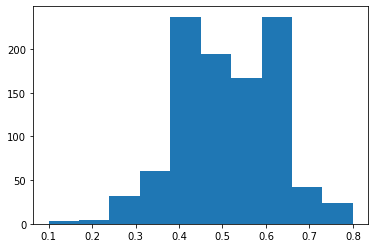

In [94]:
# Let's do dimensionality reduction over samples rather than channels:

df = np.array(data)
# Dimensionality reduction using mean over channels
df_2d = np.mean(data[:][:][:],1)


df = pd.DataFrame(df_2d)

df_A = df.iloc[:,0:100]
df_B = df.iloc[:,100:200]

labels_A = labels[0:100]
labels_B = labels[100:200]
labels_B.shape

X = df_A
y = np.ravel(labels_A)

acc = []

# plot histogram of accuracies over 1000 iterations

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.2)

    clf = LDA()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

plt.hist(acc)

